# Logistic Regression

## Imports

In [83]:
import pandas as pd
import numpy as np

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
train = pd.read_csv('/Users/farzam/Desktop/IT/ml/practice/train.csv')

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

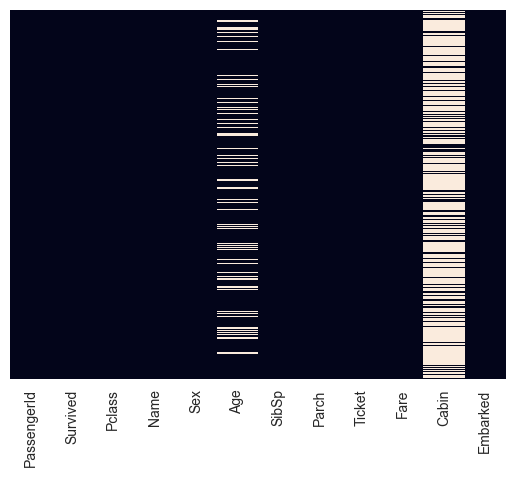

In [89]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [90]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

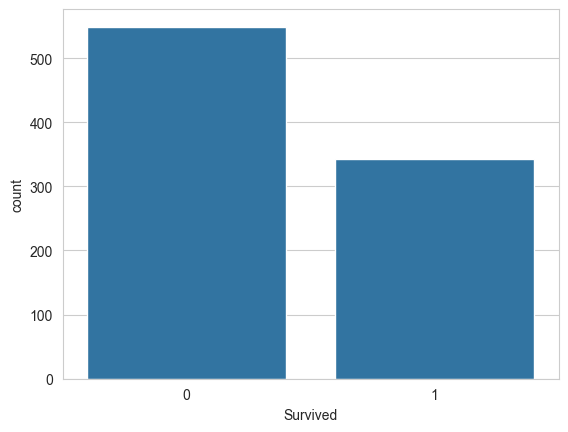

In [91]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

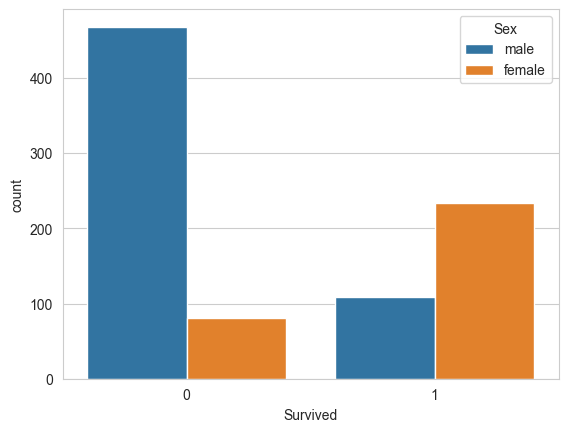

In [92]:
sns.countplot(x='Survived', data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

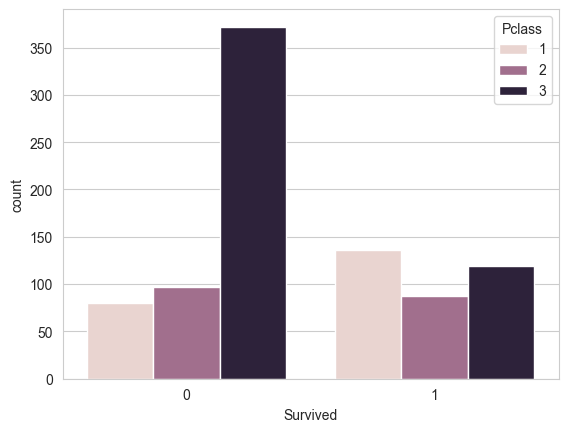

In [93]:
sns.countplot(x='Survived', data=train, hue='Pclass')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


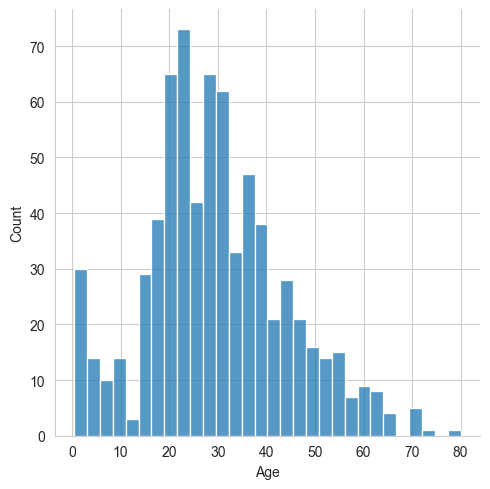

In [94]:
sns.displot(train['Age'], bins =30)

<Axes: >

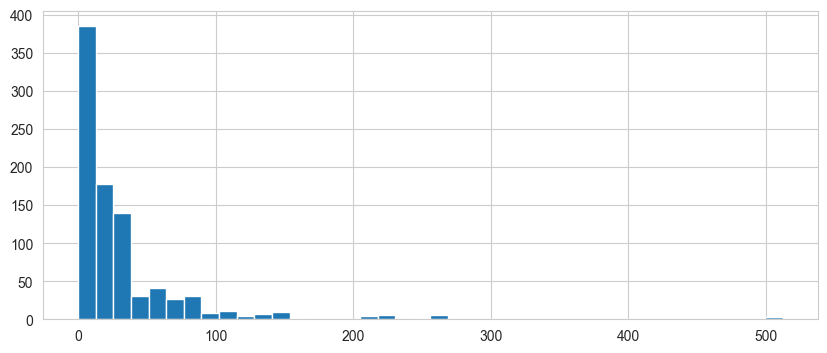

In [95]:
train['Fare'].hist(bins = 40, figsize =(10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

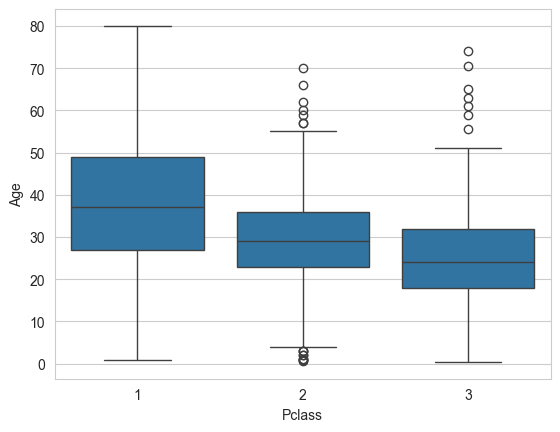

In [96]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [97]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [98]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

/var/folders/2w/lylk39n928xcc79vd8rvs1j40000gn/T/ipykernel_76046/1420374828.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/2w/lylk39n928xcc79vd8rvs1j40000gn/T/ipykernel_76046/1420374828.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

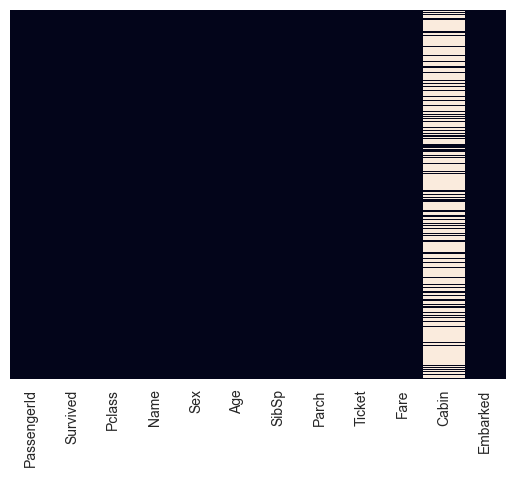

In [99]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [100]:
train.drop(columns='Cabin', axis=1, inplace=True)

<Axes: >

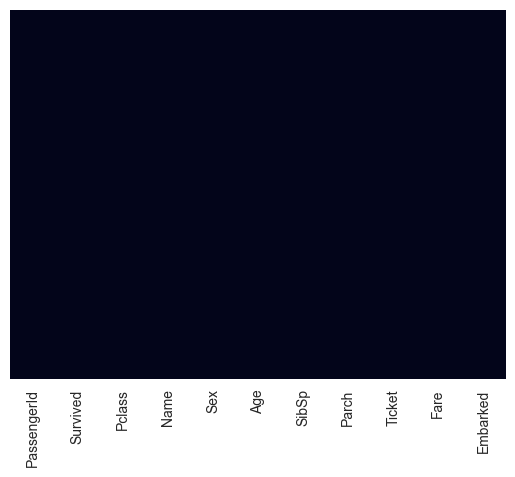

In [101]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [102]:
train.dropna(inplace=True)

In [103]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [104]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [105]:
embark = pd.get_dummies(train['Embarked'])
embark

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [106]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [107]:
train = pd.concat([train, sex, embark], axis = 1)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [109]:
train.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [111]:
train.drop(columns=['PassengerId'], inplace=True)

In [112]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [113]:
test = pd.read_csv('/Users/farzam/Desktop/IT/ml/practice/test.csv')

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [115]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

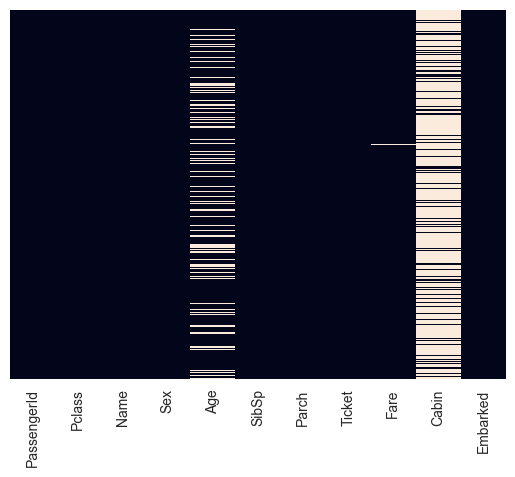

In [116]:
sns.heatmap(test.isna(),yticklabels=False,cbar=False)

In [117]:
test.drop(columns=['PassengerId', 'Cabin'], inplace=True)

In [118]:
test.drop(columns='Name', inplace=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


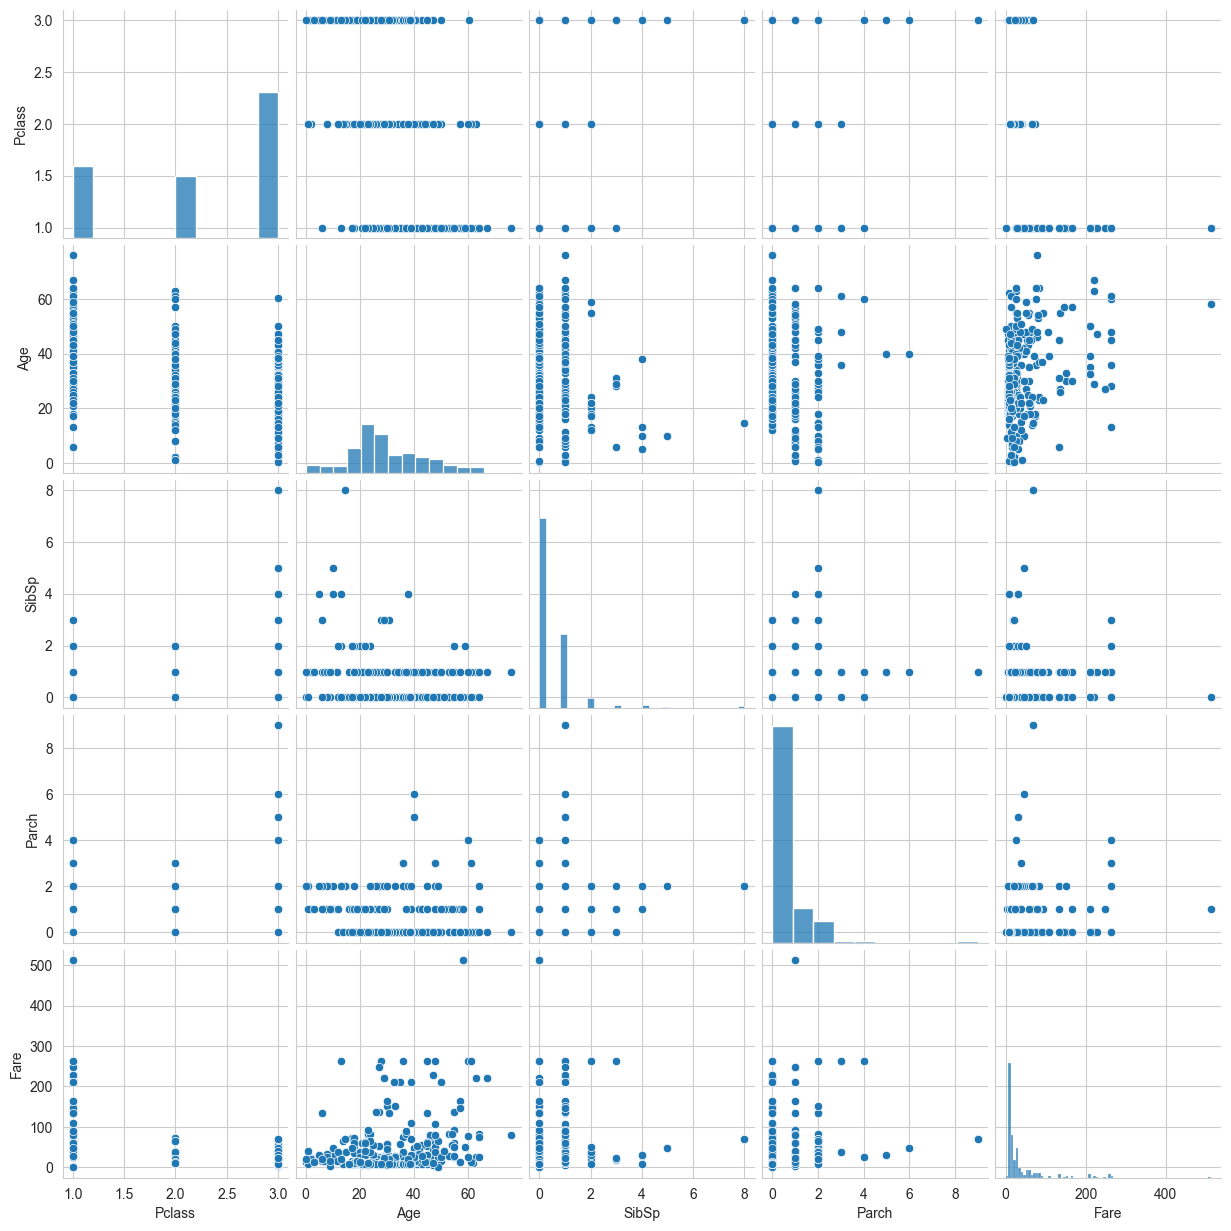

In [119]:
sns.pairplot(data=test)

<Axes: xlabel='Pclass', ylabel='Age'>

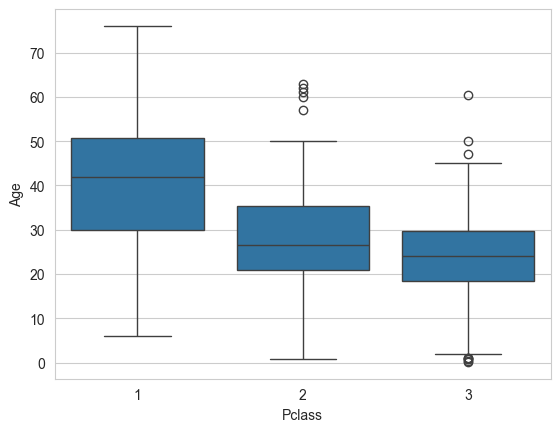

In [120]:
sns.boxplot(data=test, x='Pclass', y='Age')

In [121]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 25
    else:
        return Age

In [122]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age_test, axis=1)

/var/folders/2w/lylk39n928xcc79vd8rvs1j40000gn/T/ipykernel_76046/2852920823.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/2w/lylk39n928xcc79vd8rvs1j40000gn/T/ipykernel_76046/2852920823.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

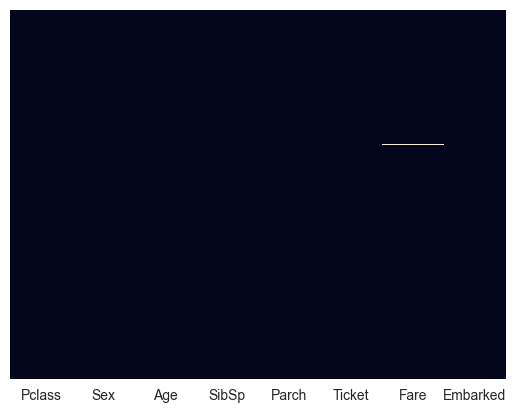

In [123]:
sns.heatmap(test.isna(),yticklabels=False,cbar=False)

In [124]:
test.dropna(inplace=True)

<Axes: >

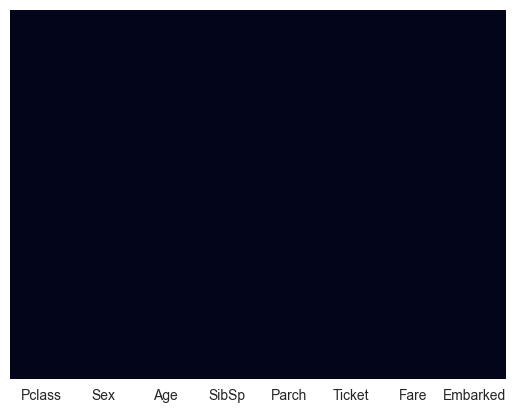

In [125]:
sns.heatmap(test.isna(),yticklabels=False,cbar=False)

In [126]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [127]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [128]:
test = pd.concat([test, sex, embark], axis = 1)

In [137]:
test.drop(columns=['Embarked', 'Ticket', 'Sex'], inplace=True)

In [138]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,34.5,0.0,0.0,7.8292,True,False,True
1,3.0,47.0,1.0,0.0,7.0000,False,False,False
2,2.0,62.0,0.0,0.0,9.6875,False,False,True
3,3.0,27.0,0.0,0.0,8.6625,False,False,True
4,3.0,22.0,1.0,1.0,12.2875,True,False,True


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X = train.drop(columns='Survived')
y = train['Survived']

In [147]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [142]:
from sklearn.linear_model import LogisticRegression

In [148]:
logmodel = LogisticRegression()

In [149]:
logmodel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
predictions = logmodel.predict(X_test)

In [146]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])